In [1]:
!gdown https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC

Downloading...
From (original): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC
From (redirected): https://drive.google.com/uc?id=1XdXz0TKo_KCDRHOMvzV-YtcTx7NPG-jC&confirm=t&uuid=3015e9dc-f02e-4156-a54f-583ebe807ca6
To: /content/clothing-dataset-small.zip
100% 106M/106M [00:02<00:00, 40.9MB/s] 


In [2]:
!unzip /content/clothing-dataset-small.zip

Archive:  /content/clothing-dataset-small.zip
   creating: clothing-dataset-small/
  inflating: clothing-dataset-small/.DS_Store  
   creating: clothing-dataset-small/test/
   creating: clothing-dataset-small/test/skirt/
  inflating: clothing-dataset-small/test/skirt/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg  
  inflating: clothing-dataset-small/test/skirt/491982c3-3e90-431e-99e6-b14ecea36384.jpg  
  inflating: clothing-dataset-small/test/skirt/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg  
  inflating: clothing-dataset-small/test/skirt/32b99302-cec7-4dec-adfa-3d4029674209.jpg  
  inflating: clothing-dataset-small/test/skirt/0558b2c5-be00-49de-b27f-8c88114ac36f.jpg  
  inflating: clothing-dataset-small/test/skirt/95e66e02-b4ed-4fe9-b538-db6bac4fb7df.jpg  
  inflating: clothing-dataset-small/test/skirt/2001dec1-1e0a-4c11-9d15-120b019b3dea.jpg  
  inflating: clothing-dataset-small/test/skirt/b0e05193-cc92-4935-88d7-e71a1b19dd4b.jpg  
  inflating: clothing-dataset-small/test/skirt/309829b2-6d1

In [3]:
!gdown https://drive.google.com/drive/folders/1wgRokkvPUoGjsUZqJEhtpJn5e5lDTL4i --folder  # OPTIONAL

Retrieving folder contents
Processing file 1yJT_CluvRxuSiWNnNhPyG5vgon0Re4_t L1_ann_model.ckpt.data-00000-of-00001
Processing file 1BiOY_1SXdkEHQmb0nVWgos0NnOvjQo1f L1_ann_model.ckpt.index
Processing file 1fnyJtYPAit6Nsa9cOD7b5G_8rXRnEv0n L1_cnn_model.ckpt.data-00000-of-00001
Processing file 1pzasWKpoLT-4yUf0ry8r0ykXegRuDzL_ L1_cnn_model.ckpt.index
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1yJT_CluvRxuSiWNnNhPyG5vgon0Re4_t
From (redirected): https://drive.google.com/uc?id=1yJT_CluvRxuSiWNnNhPyG5vgon0Re4_t&confirm=t&uuid=09b776d8-6b22-4d1e-a90f-3deae2dacd5a
To: /content/Saved Models/L1_ann_model.ckpt.data-00000-of-00001
100% 607M/607M [00:10<00:00, 59.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BiOY_1SXdkEHQmb0nVWgos0NnOvjQo1f
To: /content/Saved Models/L1_ann_model.ckpt.index
100% 1.68k/1.68k [00:00<00:00, 9.03MB/s]
Downloading...
From (original):

### 0.2 Import Libraries

a. viz libraries like matplotlib, seaborn etc.

b. DL framework like tf, keras etc.

In [4]:
# import common libraries
import os
import glob
import random
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow and its modules
import tensorflow as tf
from tensorflow import keras  # this allows <keras.> instead of <tf.keras.>
from tensorflow.keras import layers  # this allows <layers.> instead of <tf.keras.layers.>
tf.keras.utils.set_random_seed(111) # set random seed

# To supress any warnings during the flow
import warnings
warnings.filterwarnings('ignore')


In [5]:
class_dirs = os.listdir("clothing-dataset-small/train")  # list all directories inside "train" folder
image_dict = {}  # dict to store image array(key) for every class(value)
count_dict = {}  # dict to store count of files(key) for every class(value)
# iterate over all class_dirs
for cls in class_dirs:
  # get list of all path insided the sub directory
  file_paths = glob.glob(f'clothing-dataset-small/train/{cls}/*')
  # count number of files in each class and add it to count_dict
  count_dict[cls] = len(file_paths)
  # select random item from list of image paths
  image_path = random.choice(file_paths)
  # load image using keras utility funtion and save it in image_dict
  image_dict[cls] = tf.keras.utils.load_img(image_path)

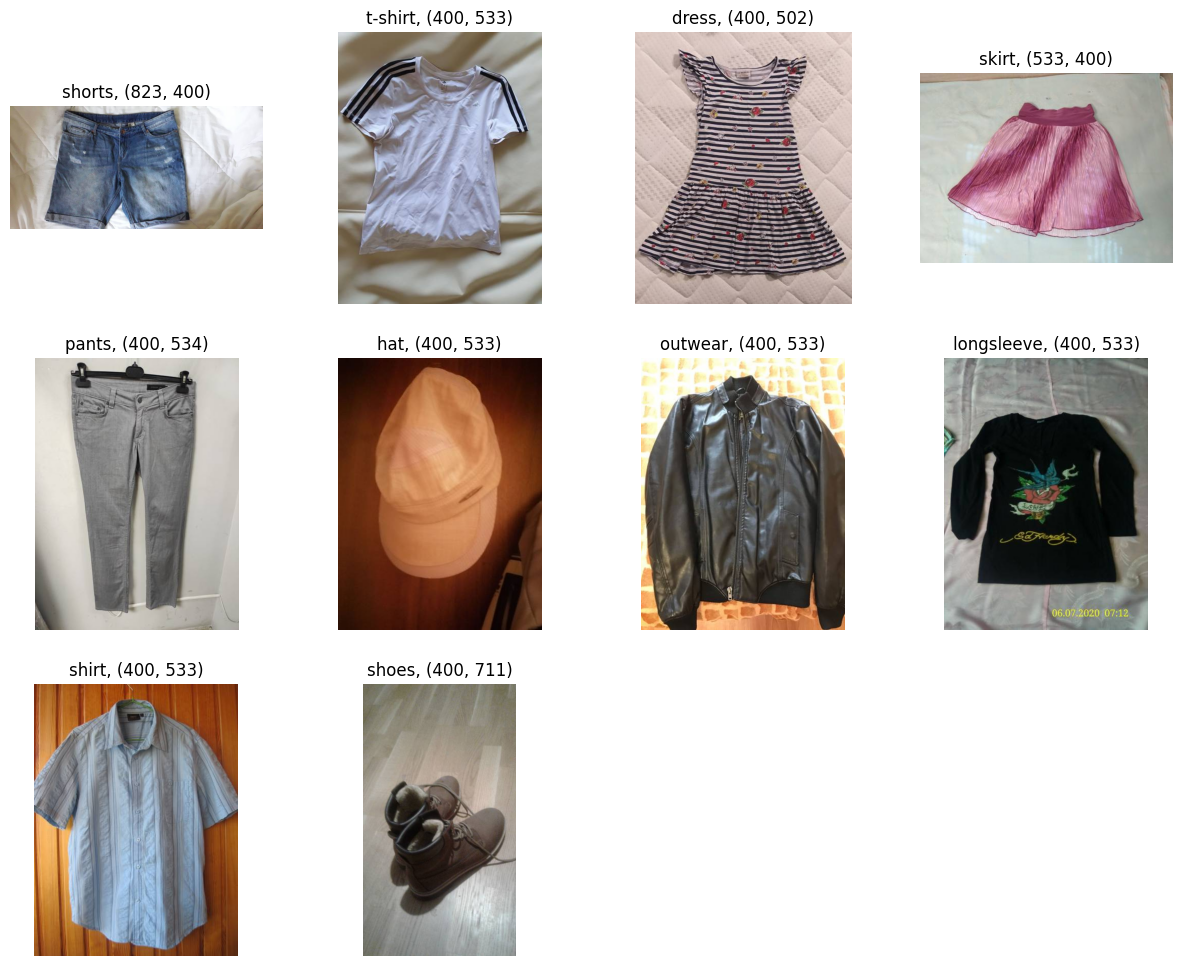

In [6]:
## Viz Random Sample form each class

plt.figure(figsize=(15,12))
# iterate over dictionary items (class label, image array)

for i, (cls,img) in enumerate(image_dict.items()):
  # create a subplot axis
  ax = plt.subplot(3, 4, i + 1)
  # plot each image
  plt.imshow(img)
  # set "class name" along with "image size" as title
  plt.title(f'{cls}, {img.size}')
  plt.axis("off")

Count of training samples per class:
         class  count
0      shorts    202
1     t-shirt    795
2       dress    241
3       skirt    112
4       pants    468
5         hat    123
6     outwear    184
7  longsleeve    455
8       shirt    290
9       shoes    198


<Axes: title={'center': 'Training Data Count per class'}, xlabel='class'>

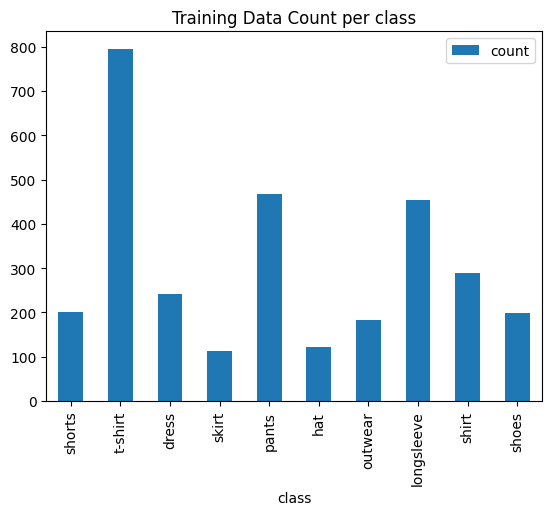

In [7]:
# Let's now plot the data Distribution of traiing Data across Classes

df_count_train = pd.DataFrame({
    "class": count_dict.keys(), # keys of count_dict are class labels
    "count": count_dict.values(), # value of count_dict contain counts of each class
})

print("Count of training samples per class:\n", df_count_train)

# draw a bar plot using pandas in-built plotting function
df_count_train.plot.bar(x='class', y='count', title="Training Data Count per class")

In [8]:
print('\nLoading Train Data...')
train_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/train", shuffle = True,
)

print('\nLoading Validation Data...')
val_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/validation", shuffle = False,
)

print('\nLoading Test Data...')
test_data = tf.keras.utils.image_dataset_from_directory(
    "clothing-dataset-small/test", shuffle = False,
)


Loading Train Data...
Found 3068 files belonging to 10 classes.

Loading Validation Data...
Found 341 files belonging to 10 classes.

Loading Test Data...
Found 372 files belonging to 10 classes.


In [9]:
height, width = 128,128 # Optional, not required if we already have re sized the data from 'image_dataset_from_directpory function.

# Data Processing Stage with resizing and rescaling operations
data_preprocess_with_flatten = keras.Sequential(
    name = "data_preprocess_with_flatten",
    layers = [
        layers.Resizing(height, width),
        layers.Rescaling(1./255),
        layers.Flatten(), # Note: We prefer NOT to add `layers.Flatten()` as part of preprocessing layers (rather as model definition itself)!
    ]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))

In [10]:
sample = next(iter(train_ds))[0]

print(sample)

tf.Tensor(
[[0.09552696 0.08768383 0.09944853 ... 0.5103711  0.47507697 0.4084103 ]
 [0.19276579 0.04910769 0.06562117 ... 0.4493935  0.12782486 0.18272682]
 [0.63098645 0.5407904  0.6113786  ... 0.93143386 0.939277   0.9353554 ]
 ...
 [0.49344397 0.49344397 0.46207142 ... 0.19694066 0.19694066 0.1655681 ]
 [0.54509807 0.43921572 0.2627451  ... 0.81038606 0.73587626 0.5672488 ]
 [0.15490197 0.04509804 0.10000001 ... 0.2515235  0.07401124 0.13448918]], shape=(32, 49152), dtype=float32)


In [11]:
# Data Processing Stage with resizing and re scaling operations
data_preprocess = keras.Sequential(
    name = "data_preprocess",
    layers = [
        layers.Resizing(height, width),  # Shape Preprocessing
        layers.Rescaling(1./255),  # Value Preprocessing
    ]
)

# Perform Data processing on the train, val, test dataset
train_ds = train_data.map(lambda x,y : (data_preprocess(x),y))
val_ds = val_data.map(lambda x,y : (data_preprocess(x),y))
test_ds = test_data.map(lambda x,y : (data_preprocess(x),y))

### 3.1 Model Architecture of Vanilla NN

- Recall the Neural Network structure covered in earilier lecture,
  
- How Neural Network is made of an Input layer, few Hidden layers and an Output layer with each neuron training on a distinct set of features based on the previous layer’s output.
  
- These complex connection (weight matrix W) between the neurons helps NN to recognize patterns in the data
><img src='https://drive.google.com/uc?id=19BIzu4JiXHNqBgTNXc8PMk_qaYR2nFK5' height=350>

In [12]:
num_classes = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = keras.Sequential(
    name = "model_ann",
    layers = [
        layers.Flatten(input_shape=(height, width, 3)), # alternatively, input_shape=next(iter(train_ds))[0],shape[1:]
        layers.Dense(units = hidden_size_1, activation='relu'), # hidden layer 1
        layers.Dense(units = hidden_size_2, activation = 'relu'), # hidden layer 2
        layers.Dense(units = num_classes, activation='softmax'), # output layer
              ]
)

In [13]:
model.summary()

Model: "model_ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      50,332,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,597,642 (193.01 MB)

 Trainable params: 50,597,642 (193.01 MB)

 Non-trainable params: 0 (0.00 B)

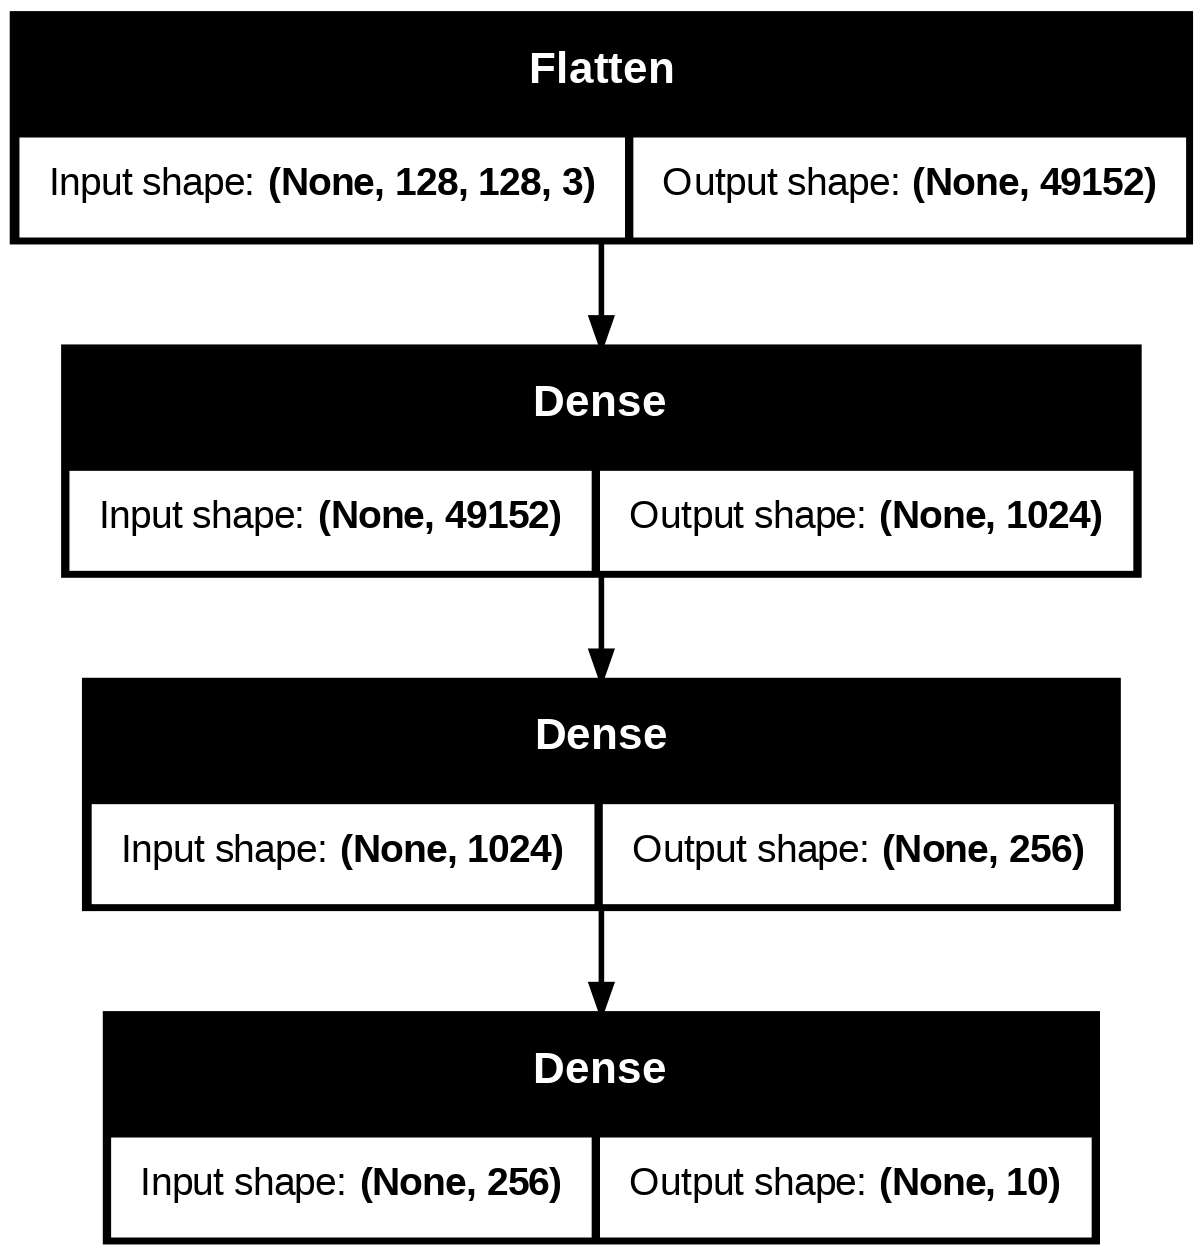

In [14]:
tf.keras.utils.plot_model(model, to_file = "model_ann.png", show_shapes=True)

In [15]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
epochs = 10
model_fit = model.fit(train_ds, validation_data=val_ds, epochs = epochs)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 54s 548ms/step - accuracy: 0.1833 - loss: 26.7567 - val_accuracy: 0.3636 - val_loss: 2.2136
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 550ms/step - accuracy: 0.3695 - loss: 2.3710 - val_accuracy: 0.4076 - val_loss: 2.1357
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 83s 560ms/step - accuracy: 0.4082 - loss: 2.0665 - val_accuracy: 0.3578 - val_loss: 1.8784
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 53s 552ms/step - accuracy: 0.4279 - loss: 1.9361 - val_accuracy: 0.4370 - val_loss: 2.0325
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 61s 630ms/step - accuracy: 0.4728 - loss: 1.7363 - val_accuracy: 0.4516 - val_loss: 1.8036
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 89s 700ms/step - accuracy: 0.4914 - loss: 1.5955 - val_accuracy: 0.4252 - val_loss: 1.7270
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 773ms/step - accuracy: 0.5192 - loss: 1.5111 - val_accuracy: 0.4487 - val_loss: 1.7765
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 62s 642ms/step - accuracy: 0.5214 - loss: 1.4760 - val_acc

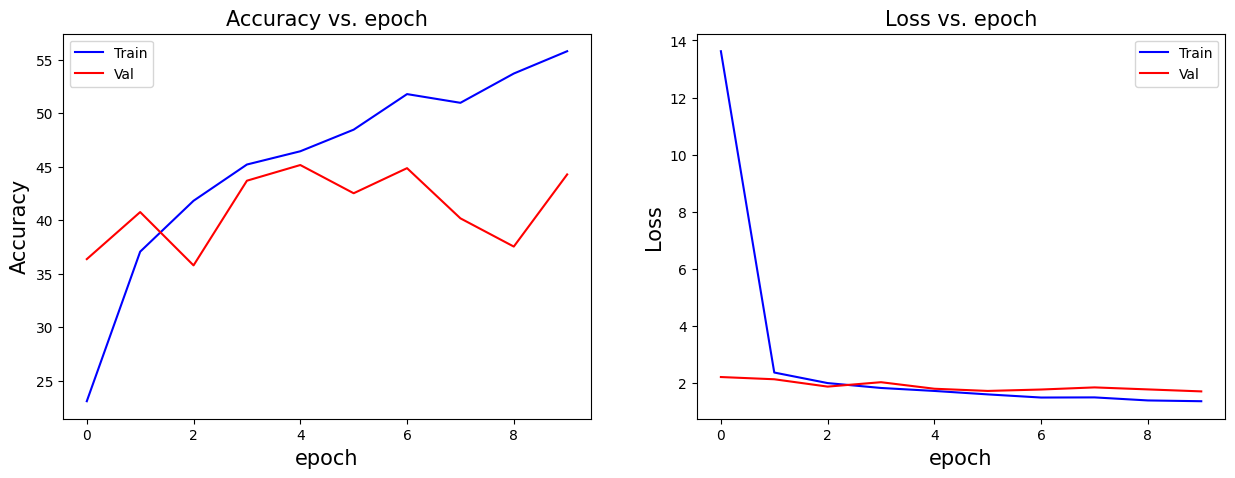

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [21]:
# run model rediction and obtain probabilities
y_pred = model.predict(test_ds)

# get list of predicted classes by taking argmax of the probabilitities(y_pred)
predicted_categories = tf.argmax(y_pred, axis=1)

# get list of class names
class_names = test_data.class_names

# create list of all "y"s labels, by iterating over test dataset
true_categories = tf.concat([y for x,y in test_ds], axis = 0)

# calaculate accuracy
test_acc = metrics.accuracy_score(true_categories, predicted_categories)*100
print(f'\n Test Accuracy: {test_acc:.2f}%\n')


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step

 Test Accuracy: 35.22%



12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step


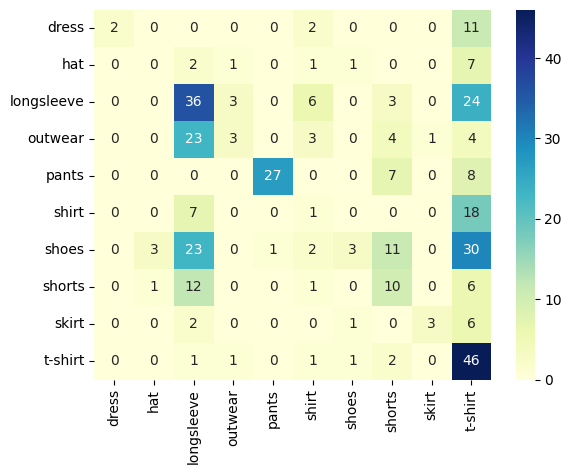

In [20]:
def ConfusionMatrix(model, ds, label_list):
# Note: This logic doesnt work with shuffled data sets
  # run model prediction and obtain probabilities
  y_pred = model.predict(ds)
  # get list of predicted clases by taking argmax of the probability(y_pred)
  predicted_categories = tf.argmax(y_pred, axis=1)
  # create lis of all "y"s labels, by iterating over test dataset
  true_categories = tf.concat([y for x,y in ds], axis = 0)

  #generate confusion matrix and plot it
  cm = metrics.confusion_matrix(true_categories, predicted_categories) # last batch
  sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu", fmt='g')
  plt.show()

ConfusionMatrix(model, test_ds, test_data.class_names)

In [ ]:
# function  to plot image, its true label and class probabilities (pred_array)
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax()